<a href="https://colab.research.google.com/github/Michalinh0/DS2022/blob/main/Classification/Covertype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
!pip install --upgrade category_encoders




[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Prepare dataset

In [2]:
covertype_dataset = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/Classification/sources/covtype.data")

print("Read data")

strOfNames = ["Elevation" , "Aspect" , "Slope" , "Horizontal_Distance_To_Hydrology" , "Vertical_Distance_To_Hydrology" , "Horizontal_Distance_To_Roadways" , "Hillshade_9am" , "Hillshade_Noon" , "Hillshade_3pm" , "Horizontal_Distance_To_Fire_Points"]
for i in range(4):
  strOfNames.append("Wilderness_Area" + str(i+1))
for i in range(40):
  strOfNames.append("Soil_type" + str(i+1))
strOfNames.append("Cover_type")

covertype_dataset.columns = strOfNames

Read data


In [3]:
input_vector = strOfNames[0:54]
print(input_vector)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_type1', 'Soil_type2', 'Soil_type3', 'Soil_type4', 'Soil_type5', 'Soil_type6', 'Soil_type7', 'Soil_type8', 'Soil_type9', 'Soil_type10', 'Soil_type11', 'Soil_type12', 'Soil_type13', 'Soil_type14', 'Soil_type15', 'Soil_type16', 'Soil_type17', 'Soil_type18', 'Soil_type19', 'Soil_type20', 'Soil_type21', 'Soil_type22', 'Soil_type23', 'Soil_type24', 'Soil_type25', 'Soil_type26', 'Soil_type27', 'Soil_type28', 'Soil_type29', 'Soil_type30', 'Soil_type31', 'Soil_type32', 'Soil_type33', 'Soil_type34', 'Soil_type35', 'Soil_type36', 'Soil_type37', 'Soil_type38', 'Soil_type39', 'Soil_type40']


                                    Elevation    Aspect     Slope  \
Elevation                            1.000000  0.015733 -0.242701   
Aspect                               0.015733  1.000000  0.078726   
Slope                               -0.242701  0.078726  1.000000   
Horizontal_Distance_To_Hydrology     0.306229  0.017376 -0.010607   
Vertical_Distance_To_Hydrology       0.093305  0.070304  0.274974   
Horizontal_Distance_To_Roadways      0.365558  0.025119 -0.215918   
Hillshade_9am                        0.112180 -0.579273 -0.327199   
Hillshade_Noon                       0.205888  0.336104 -0.526911   
Hillshade_3pm                        0.059148  0.646945 -0.175854   
Horizontal_Distance_To_Fire_Points   0.148030 -0.109167 -0.185656   
Wilderness_Area1                     0.131840 -0.140121 -0.234574   
Wilderness_Area2                     0.238163  0.055988 -0.036253   
Wilderness_Area3                     0.066548  0.074902  0.125661   
Wilderness_Area4                  

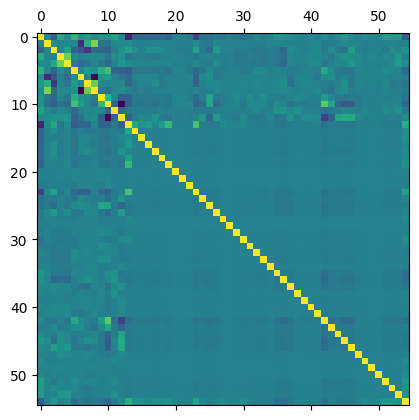

In [4]:
#plot = plt.scatter(,covertype_dataset["Elevation"])
#covertype_dataset.describe()
#seaborn.displot(covertype_dataset , x = "Elevation")
#seaborn.displot(covertype_dataset , x = "Aspect")
#seaborn.displot(covertype_dataset , x = "Slope")
#seaborn.displot(covertype_dataset , x = "Horizontal_Distance_To_Hydrology")
#seaborn.displot(covertype_dataset , x = "Vertical_Distance_To_Hydrology")
#seaborn.displot(covertype_dataset , x = "Horizontal_Distance_To_Roadways")
#seaborn.displot(covertype_dataset , x = "Hillshade_9am")
#seaborn.displot(covertype_dataset , x = "Hillshade_Noon")
#seaborn.displot(covertype_dataset , x = "Hillshade_3pm")
#seaborn.displot(covertype_dataset , x = "Horizontal_Distance_To_Fire_Points")
covertype_dataset["Cover_type"].value_counts()
corr = covertype_dataset.corr()
plt.matshow(corr)
print(corr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'Elevation'),
  Text(1, 0, 'Aspect'),
  Text(2, 0, 'Slope'),
  Text(3, 0, 'Horizontal_Distance_To_Hydrology'),
  Text(4, 0, 'Vertical_Distance_To_Hydrology'),
  Text(5, 0, 'Horizontal_Distance_To_Roadways'),
  Text(6, 0, 'Hillshade_9am'),
  Text(7, 0, 'Hillshade_Noon'),
  Text(8, 0, 'Hillshade_3pm'),
  Text(9, 0, 'Horizontal_Distance_To_Fire_Points'),
  Text(10, 0, 'Wilderness_Area1'),
  Text(11, 0, 'Wilderness_Area2'),
  Text(12, 0, 'Wilderness_Area3'),
  Text(13, 0, 'Wilderness_Area4'),
  Text(14, 0, 'Soil_type1'),
  Text(15, 0, 'Soil_type2'),
  Text(16, 0, 'Soil_type3'),
  Text(17, 0, 'Soil_type4'),
  Text(18, 0, 'Soil_type5'),
  Text(19, 0, 'Soil_type6'),
  Text(20, 0, 'Soil_type7'),
  Text(21, 0, 'Soil_type8'),
  Text(

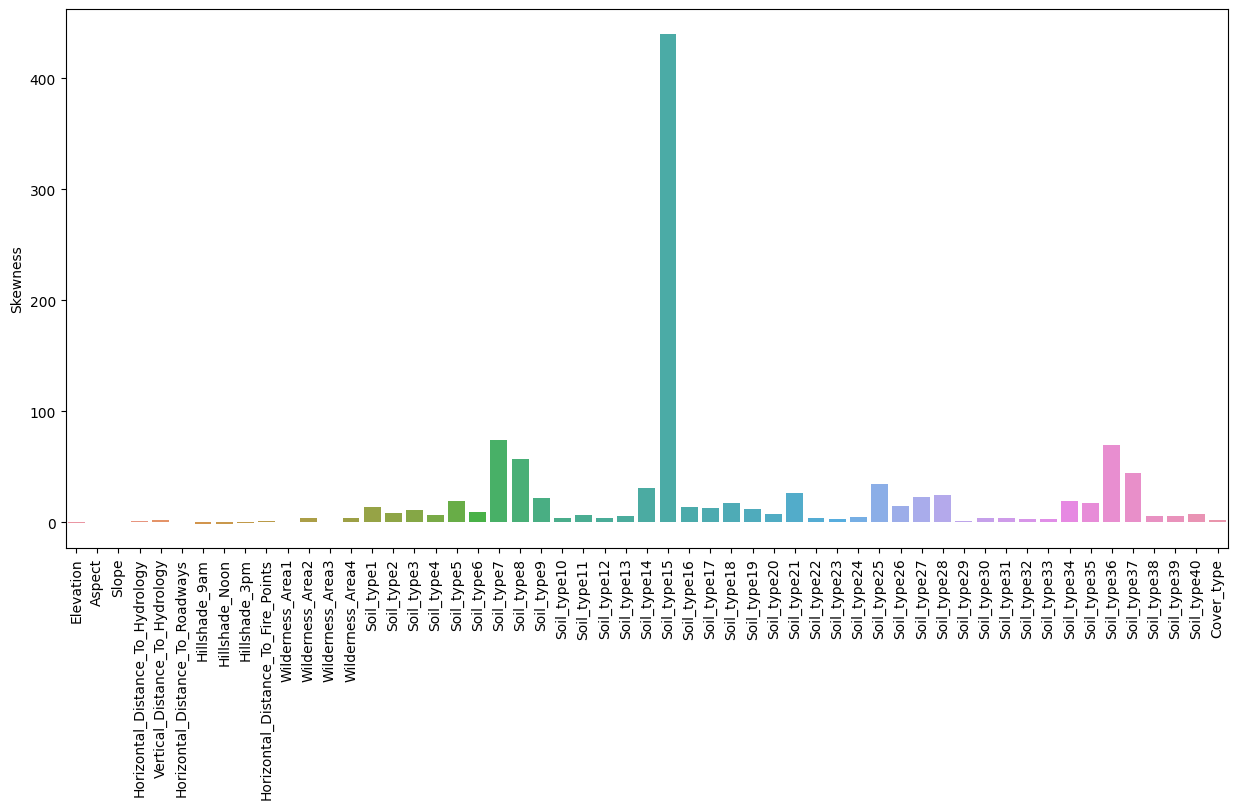

In [5]:
skew=covertype_dataset.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

<AxesSubplot: >

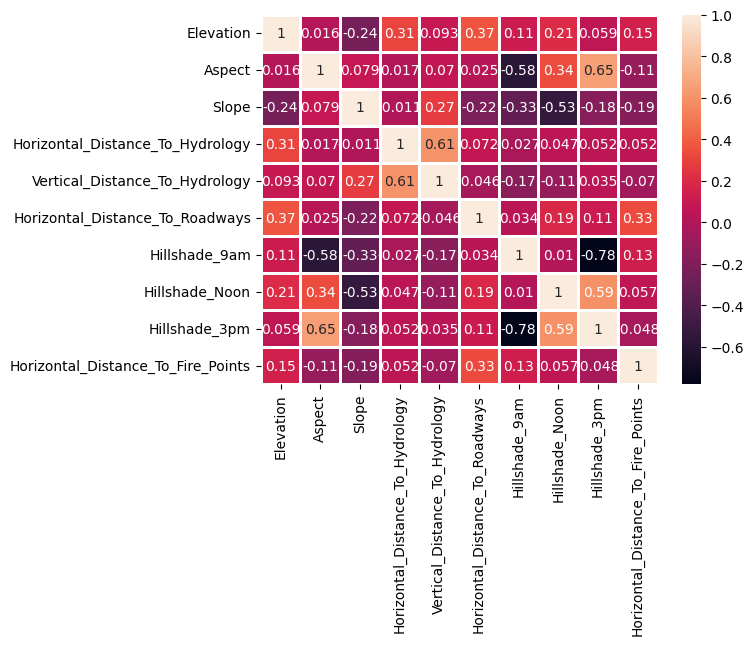

In [6]:
cont_data=covertype_dataset.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
sns.heatmap(cont_data.corr(),linewidths=1,annot=True)

First model : no data manipulation

trzeba wywalic niektore mocno skorelowane zmienne 

In [7]:
x = covertype_dataset[input_vector]
y = covertype_dataset["Cover_type"]

x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.1)

y_test.value_counts()


2    28465
1    21021
3     3542
7     2072
6     1798
5      938
4      266
Name: Cover_type, dtype: int64

In [8]:
model = LogisticRegression(class_weight = 'balanced' , solver='liblinear')
model.fit(x_train , y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [9]:
y_pred = model.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           1      0.672     0.670     0.671     21021
           2      0.756     0.585     0.660     28465
           3      0.638     0.684     0.660      3542
           4      0.353     0.677     0.464       266
           5      0.106     0.572     0.179       938
           6      0.313     0.491     0.382      1798
           7      0.546     0.766     0.638      2072

    accuracy                          0.626     58102
   macro avg      0.483     0.635     0.522     58102
weighted avg      0.685     0.626     0.646     58102



Data normalization

In [10]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)
df = pd.DataFrame(x_scaled)
df.describe()

[[0.36568284 0.15555556 0.03030303 ... 0.         0.         0.        ]
 [0.47273637 0.38611111 0.13636364 ... 0.         0.         0.        ]
 [0.46323162 0.43055556 0.27272727 ... 0.         0.         0.        ]
 ...
 [0.26363182 0.44166667 0.25757576 ... 0.         0.         0.        ]
 [0.26263132 0.47222222 0.22727273 ... 0.         0.         0.        ]
 [0.26213107 0.45833333 0.1969697  ... 0.         0.         0.        ]]


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,0.550458,0.432381,0.213693,0.192862,0.283487,0.330216,0.835221,0.879207,0.561135,0.276075,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184607,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.652326,0.722222,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Second model - normalized data


In [11]:
x_train ,x_test , y_train , y_test = train_test_split(x_scaled,y,test_size = 0.1)
model = LogisticRegression(solver='liblinear' , class_weight = 'balanced')
model.fit(x_train , y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [12]:
y_pred = model.predict(x_test)

print (metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))

[[14326  5060    21     0   254   121  1449]
 [ 5700 19831   790     3  1044   741   125]
 [    0   145  2552   237    28   667     0]
 [    0     0    55   170     0    24     0]
 [   11   460    76     0   362    30     0]
 [    0   167   606    73    91   830     0]
 [  382     4     4     0     0     0  1663]]
              precision    recall  f1-score   support

           1      0.702     0.675     0.688     21231
           2      0.773     0.702     0.736     28234
           3      0.622     0.703     0.660      3629
           4      0.352     0.683     0.464       249
           5      0.203     0.386     0.266       939
           6      0.344     0.470     0.397      1767
           7      0.514     0.810     0.629      2053

    accuracy                          0.684     58102
   macro avg      0.501     0.633     0.549     58102
weighted avg      0.704     0.684     0.691     58102



Third model - target encoding

In [13]:
import pandas as pd
# Assume that you have a dataframe called "df" with binary columns

df = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/Classification/sources/covtype.data")

soils = []
strOfNames = ["Elevation" , "Aspect" , "Slope" , "Horizontal_Distance_To_Hydrology" , "Vertical_Distance_To_Hydrology" , "Horizontal_Distance_To_Roadways" , "Hillshade_9am" , "Hillshade_Noon" , "Hillshade_3pm" , "Horizontal_Distance_To_Fire_Points"]
for i in range(4):
  strOfNames.append("Wilderness_Area" + str(i+1))
for i in range(40):
  strOfNames.append("Soil_type" + str(i+1))
  soils.append("Soil_type" + str(i+1))
strOfNames.append("Cover_type")

df.columns = strOfNames
df['Soil_type'] = df[soils].idxmax(1)
print(df['Soil_type'])
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df['encoded Soil_type'] = encoder.fit_transform(df['Soil_type'], df['Cover_type'], min_samples_leaf=20, smoothing=10)
print(soils)
df.drop(columns=['Soil_type'])
df.drop(columns=soils, axis=1, inplace=True)
covertype_dataset = df
covertype_dataset.describe()

0         Soil_type29
1         Soil_type12
2         Soil_type30
3         Soil_type29
4         Soil_type29
             ...     
581006     Soil_type2
581007     Soil_type2
581008     Soil_type2
581009     Soil_type2
581010     Soil_type2
Name: Soil_type, Length: 581011, dtype: object


C:\Users\macho\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\macho\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


['Soil_type1', 'Soil_type2', 'Soil_type3', 'Soil_type4', 'Soil_type5', 'Soil_type6', 'Soil_type7', 'Soil_type8', 'Soil_type9', 'Soil_type10', 'Soil_type11', 'Soil_type12', 'Soil_type13', 'Soil_type14', 'Soil_type15', 'Soil_type16', 'Soil_type17', 'Soil_type18', 'Soil_type19', 'Soil_type20', 'Soil_type21', 'Soil_type22', 'Soil_type23', 'Soil_type24', 'Soil_type25', 'Soil_type26', 'Soil_type27', 'Soil_type28', 'Soil_type29', 'Soil_type30', 'Soil_type31', 'Soil_type32', 'Soil_type33', 'Soil_type34', 'Soil_type35', 'Soil_type36', 'Soil_type37', 'Soil_type38', 'Soil_type39', 'Soil_type40']


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_type,encoded Soil_type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,0.448864,0.051434,0.436074,0.063627,2.051465,2.051463
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,0.497379,0.220882,0.495897,0.244088,1.396500,0.729582
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.118138
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.700701
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.716731
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.245253
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000


In [14]:
covertype_dataset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_type,encoded Soil_type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,0.448864,0.051434,0.436074,0.063627,2.051465,2.051463
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,0.497379,0.220882,0.495897,0.244088,1.396500,0.729582
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.118138
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.700701
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.716731
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.245253
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000


In [15]:
input_vector = strOfNames[0:14]
input_vector.append("encoded Soil_type")
print(input_vector)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'encoded Soil_type']


In [16]:
x = covertype_dataset[input_vector]
y = covertype_dataset["Cover_type"]

x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.1)

y_test.value_counts()

model = LogisticRegression(class_weight = 'balanced' , solver='liblinear')
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           1      0.667     0.636     0.651     21103
           2      0.762     0.650     0.702     28471
           3      0.583     0.621     0.601      3651
           4      0.289     0.541     0.377       255
           5      0.125     0.396     0.190       940
           6      0.293     0.424     0.346      1678
           7      0.415     0.812     0.549      2004

    accuracy                          0.638     58102
   macro avg      0.448     0.583     0.488     58102
weighted avg      0.679     0.638     0.652     58102



In [17]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [18]:
def classification_(train,y):
    
    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    rf=RandomForestClassifier()

    x=train
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    algos=[k,d,rf]
    algos_name=['KNeigbors','DecisionTree','RandomForest']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='micro'))
        recall.append(recall_score(y_test,predict,average='micro'))
        f1.append(f1_score(y_test,predict,average='micro'))
        

    
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('f1_Score',ascending=False)

In [19]:
classification_(x,y)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
KNeigbors,0.968908,0.968908,0.968908,0.968908
RandomForest,0.960345,0.960345,0.960345,0.960345
DecisionTree,0.939614,0.939614,0.939614,0.939614


In [20]:
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

0.10.1


In [21]:
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)
y.value_counts()

5    283301
2    283301
1    283301
7    283301
3    283301
6    283301
4    283301
Name: Cover_type, dtype: int64

In [24]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.1)
predict = RandomForestClassifier().fit(x_train , y_train).predict(x_test)
print(metrics.classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

           1      0.978     0.974     0.976     28300
           2      0.977     0.970     0.973     28151
           3      0.997     0.998     0.997     28228
           4      0.999     1.000     1.000     28634
           5      0.996     1.000     0.998     28436
           6      0.996     0.999     0.998     28447
           7      0.997     1.000     0.998     28115

    accuracy                          0.991    198311
   macro avg      0.991     0.991     0.991    198311
weighted avg      0.991     0.991     0.991    198311



In [28]:
predict = KNeighborsClassifier().fit(x_train , y_train).predict(x_test)
print(metrics.classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

           1      0.976     0.981     0.978     28300
           2      0.987     0.959     0.972     28151
           3      0.996     0.998     0.997     28228
           4      0.999     1.000     0.999     28634
           5      0.990     1.000     0.995     28436
           6      0.995     0.999     0.997     28447
           7      0.994     1.000     0.997     28115

    accuracy                          0.991    198311
   macro avg      0.991     0.991     0.991    198311
weighted avg      0.991     0.991     0.991    198311



In [27]:
predict = DecisionTreeClassifier().fit(x_train , y_train).predict(x_test)
print(metrics.classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

           1      0.958     0.957     0.957     28300
           2      0.957     0.946     0.952     28151
           3      0.991     0.992     0.992     28228
           4      0.998     0.999     0.999     28634
           5      0.993     0.997     0.995     28436
           6      0.991     0.994     0.992     28447
           7      0.995     0.998     0.997     28115

    accuracy                          0.983    198311
   macro avg      0.983     0.983     0.983    198311
weighted avg      0.983     0.983     0.983    198311

